In [6]:
pip install graphviz

   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   -------------------------- ------------- 30.7/47.1 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 47.1/47.1 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
# importing libraries
from sklearn.tree import DecisionTreeClassifier #결정트리 분류기 불러오
from sklearn.datasets import load_iris #붓꽃 데이터 세트 불러오기
from sklearn.model_selection import train_test_split #데이터 분할
import warnings #경고 모듈 불러오기(모든 경고 무시)
warnings.filterwarnings('ignore')

#DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state = 156)

#붓꽃 데이터 로딩, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size=0.2, random_state = 11)

#DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [4]:
# graphviz 함수 불러오기
from sklearn.tree import export_graphviz

# export_graphviz 호출 결과로 out_file로 지정된 tree.dot 파일 생성
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names,
                feature_names = iris_data.feature_names, impurity=True, filled=True)

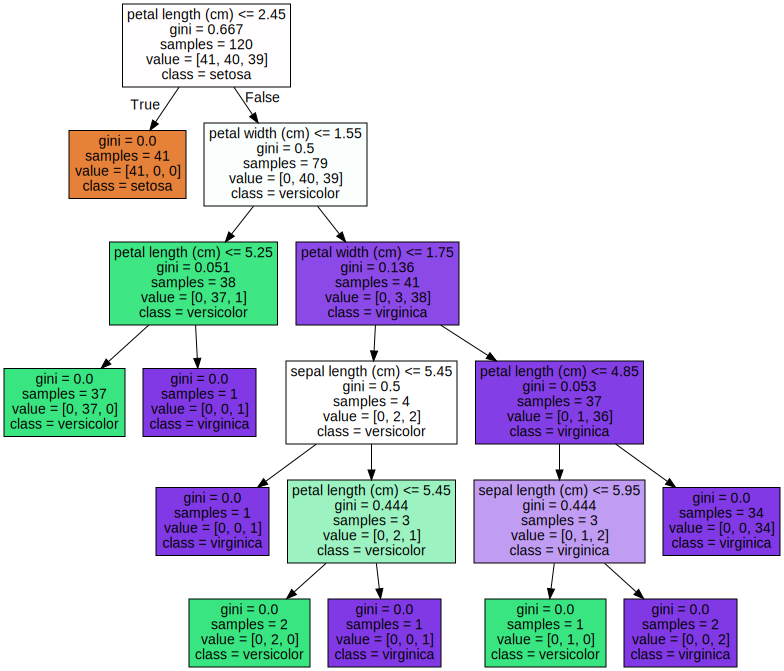

In [7]:
import graphviz
#위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 시각화
with open("tree.dot")as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

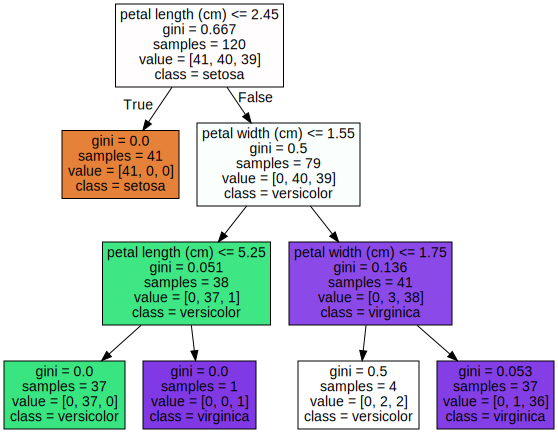

In [8]:
#DecisionTree Classifier 생성 (트리 최대 깊이 설정)
dt_clf = DecisionTreeClassifier(random_state = 156, max_depth=3)

#붓꽃 데이터 로딩, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size=0.2, random_state = 11)

#DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

# export_graphviz 호출 결과로 out_file로 지정된 tree.dot1 파일 생성
export_graphviz(dt_clf, out_file="tree.dot1", class_names=iris_data.target_names,
                feature_names = iris_data.feature_names, impurity=True, filled=True)

#위에서 생성된 tree.dot1 파일을 Graphviz가 읽어서 시각화
with open("tree.dot1")as f1:
    dot_graph = f1.read()
graphviz.Source(dot_graph)

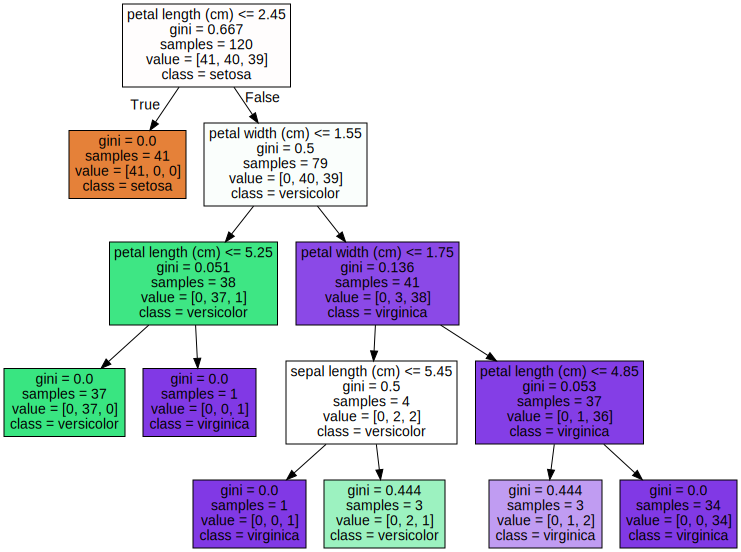

In [9]:
#DecisionTree Classifier 생성 (최소한의 샘플 데이터 개수 설정)
dt_clf = DecisionTreeClassifier(random_state = 156, min_samples_split=4)

#붓꽃 데이터 로딩, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size=0.2, random_state = 11)

#DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

# export_graphviz 호출 결과로 out_file로 지정된 tree.dot2 파일 생성
export_graphviz(dt_clf, out_file="tree.dot2", class_names=iris_data.target_names,
                feature_names = iris_data.feature_names, impurity=True, filled=True)

#위에서 생성된 tree.dot2 파일을 Graphviz가 읽어서 시각화
with open("tree.dot2")as f2:
    dot_graph = f2.read()
graphviz.Source(dot_graph)

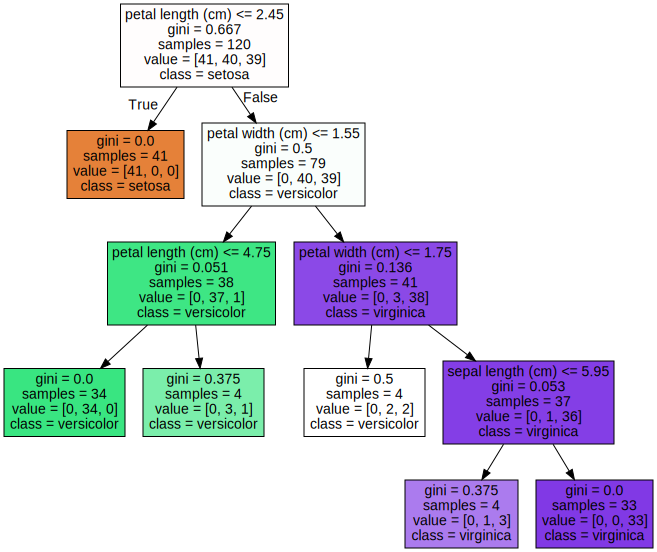

In [11]:
#DecisionTree Classifier 생성 (최소 데이터 건수를 지정)
dt_clf = DecisionTreeClassifier(random_state = 156, min_samples_leaf=4)

#붓꽃 데이터 로딩, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size=0.2, random_state = 11)

#DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

# export_graphviz 호출 결과로 out_file로 지정된 tree.dot3 파일 생성
export_graphviz(dt_clf, out_file="tree.dot3", class_names=iris_data.target_names,
                feature_names = iris_data.feature_names, impurity=True, filled=True)

#위에서 생성된 tree.dot3 파일을 Graphviz가 읽어서 시각화
with open("tree.dot3")as f3:
    dot_graph = f3.read()
graphviz.Source(dot_graph)

Feature importances:
[0.006 0.    0.546 0.448]
sepal length (cm) : 0.006
sepal width (cm) : 0.000
petal length (cm) : 0.546
petal width (cm) : 0.448


<Axes: >

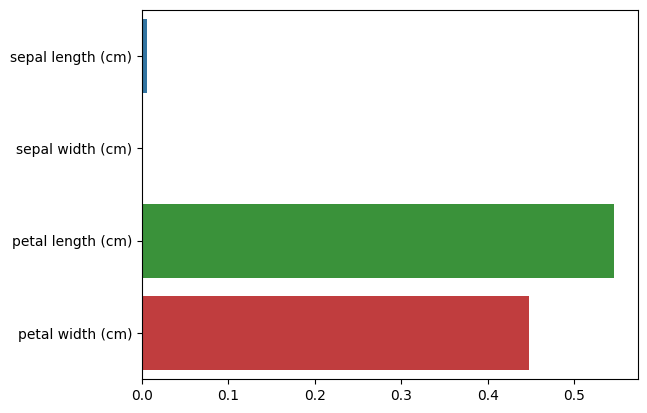

In [14]:
# 붓꽃 데이터 세트에서 피처별로 중요도 추출하기
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importances 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_,3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feautre importace를 column 별로 시각화하기 (barplot 이용)
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

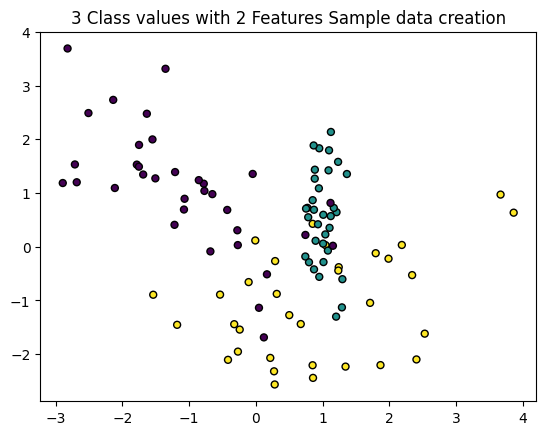

In [15]:
# 분류를 위한 테스트용 데이터 세트 생성
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해 피처는 2개, 클래스는 3가지 유형의 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                           n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, edgecolor='k')

In [16]:
# visualize_boundary 함수 생성﻿
def visualize_boundary(model, X, y):
    fig, ax = plt.subplots()
    
    # 학습 데이터 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # model 학습 
    model.fit(X, y)
    
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

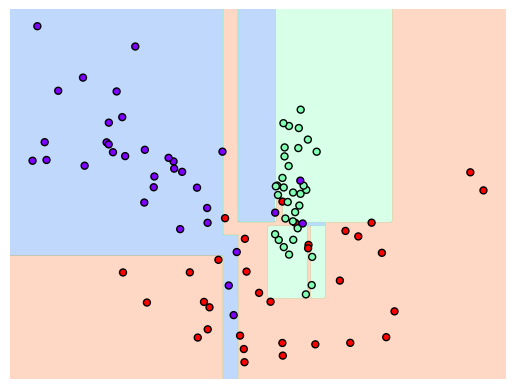

In [17]:
# 결정 기준 경계 시각화
from sklearn.tree import DecisionTreeClassifier

#특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier(random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

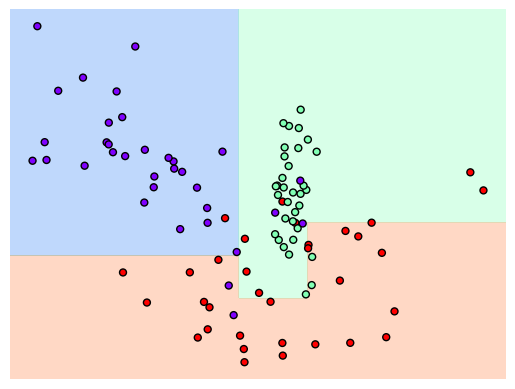

In [18]:
# min_samples_leaf = 6 을 설정하여 결정 기준 경계 살펴보기
dt_clf = DecisionTreeClassifier(min_samples_leaf=6, random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)